In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *
from rpy2.robjects.packages import importr

In [74]:
data = pd.read_csv('/Users/habbasi/Desktop/2016_03_14_TargetID_Wagner_Schenone_BWH/similarity_matrix/combined_median_target_Drug_CSV/combined_normalized_variable_selected/drug_target_combined_normalized_var_selected_UMAP.csv', encoding='latin1')



/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (1082) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [75]:
target = data.loc[data['Metadata_Plate_Map_Name'] == 'C-7217-01-B80-003-A549']
drug = data.loc[data['Metadata_Plate_Map_Name'] != 'C-7217-01-B80-003-A549']
target.to_csv('/Users/habbasi/Desktop/2016_03_14_TargetID_Wagner_Schenone_BWH/similarity_matrix/target_combined_normalized_var_selected_UMAP.csv')

In [76]:
suspicious_dmso = "/Users/habbasi/Desktop/2016_03_14_TargetID_Wagner_Schenone_BWH/metadata/Target_DMSO_weird.csv"
dmso_s = pd.read_csv(suspicious_dmso)

In [77]:
df3 = pd.merge(target,dmso_s,left_on=['Metadata_Plate', 'Metadata_Well'], right_on = ['Metadata_Plate', 'Metadata_Well'], how = 'left')


df3['Metadata_type'] = None
df3.loc[df3['Metadata_pert_type']=='trt', 'Metadata_type'] = 'Treatments'
df3.loc[(df3.Metadata_pert_type=="control") & (df3.Metadata_controls =="DMSO"), 'Metadata_type'] = 'Supicious_DMSO'
df3.loc[(df3.Metadata_pert_type=="control") & (df3.Metadata_controls !="DMSO"), 'Metadata_type'] = 'DMSO'
df3

,Metadata_Plate,Metadata_Well,Metadata_Plate_Map_Name,Metadata_broad_sample,Metadata_mg_per_ml,Metadata_mmoles_per_liter,Metadata_solvent,Metadata_pert_id,Metadata_pert_mfc_id,Metadata_pert_well,...,Nuclei_Texture_SumAverage_RNA_10_0,Nuclei_Texture_Entropy_DNA_20_0,Nuclei_RadialDistribution_MeanFrac_AGP_1of4,Nuclei_Texture_SumVariance_DNA_10_0,Nuclei_Texture_SumVariance_DNA_20_0,Nuclei_Texture_SumVariance_ER_20_0,Metadata_platemap,Metadata_submitter,Metadata_controls,Metadata_type
0,BR00092790,A01,C-7217-01-B80-003-A549,DMSO,0.000000,0.000000,NaN,NaN,NaN,A01,...,-0.228688,1.962688,0.564242,1.220693,0.664363,1.436611,DMSO,NaN,NaN,DMSO
1,BR00092790,A02,C-7217-01-B80-003-A549,DMSO,0.000000,0.000000,DMSO,NaN,NaN,A02,...,-1.554559,-0.266257,-0.487684,0.238012,0.375236,1.345596,DMSO,NaN,NaN,DMSO
2,BR00092790,A03,C-7217-01-B80-003-A549,BRD-K15318909-001-02-2,1.852203,10.000000,DMSO,BRD-K15318909,BRD-K15318909-001-02-2,A03,...,-0.482684,-1.162348,-0.723071,-0.173534,0.042539,1.350699,t,NaN,NaN,Treatments
3,BR00092790,A04,C-7217-01-B80-003-A549,BRD-K15318909-001-02-2,0.617401,3.333333,DMSO,BRD-K15318909,BRD-K15318909-001-02-2,A04,...,2.277766,-4.777382,-0.628413,-4.828345,-5.311893,2.025663,t,NaN,NaN,Treatments
4,BR00092790,A05,C-7217-01-B80-003-A549,BRD-K78599730-001-02-6,1.376607,2.500000,DMSO,BRD-K78599730,BRD-K78599730-001-02-6,A05,...,-0.350170,-1.289033,-1.008223,-1.390675,-1.388470,-0.127653,t,NaN,NaN,Treatments
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1959,BR00092794,P21,C-7217-01-B80-003-A549,DMSO,0.000000,0.000000,DMSO,NaN,NaN,P21,...,1.861172,0.687343,1.060261,1.012223,1.582467,-2.223482,DMSO,NaN,DMSO,Supicious_DMSO
1960,BR00092794,P22,C-7217-01-B80-003-A549,DMSO,0.000000,0.000000,DMSO,NaN,NaN,P22,...,0.905732,0.686565,2.721741,0.426361,0.375781,-0.556903,DMSO,NaN,DMSO,Supicious_DMSO
1961,BR00092794,P23,C-7217-01-B80-003-A549,DMSO,0.000000,0.000000,NaN,NaN,NaN,P23,...,2.200226,1.221176,1.787698,1.084387,1.705075,-1.913417,DMSO,NaN,DMSO,Supicious_DMSO
1962,BR00092794,P24,C-7217-01-B80-003-A549,DMSO,0.000000,0.000000,DMSO,NaN,NaN,P24,...,0.991642,-0.766234,0.917538,0.014528,0.912505,-2.173945,DMSO,NaN,DMSO,Supicious_DMSO


In [78]:
Metadata = [col for col in df3.columns if 'Meta' in col]
Variables = [col for col in df3.columns if not 'Meta' in col]

In [79]:
dmso= df3.loc[df3['Metadata_type'] == "DMSO"]


Suspicious_dmso = df3.loc[df3['Metadata_type'] == "Supicious_DMSO"]

Suspicious_dmso

,Metadata_Plate,Metadata_Well,Metadata_Plate_Map_Name,Metadata_broad_sample,Metadata_mg_per_ml,Metadata_mmoles_per_liter,Metadata_solvent,Metadata_pert_id,Metadata_pert_mfc_id,Metadata_pert_well,...,Nuclei_Texture_SumAverage_RNA_10_0,Nuclei_Texture_Entropy_DNA_20_0,Nuclei_RadialDistribution_MeanFrac_AGP_1of4,Nuclei_Texture_SumVariance_DNA_10_0,Nuclei_Texture_SumVariance_DNA_20_0,Nuclei_Texture_SumVariance_ER_20_0,Metadata_platemap,Metadata_submitter,Metadata_controls,Metadata_type
46,BR00092790,B23,C-7217-01-B80-003-A549,DMSO,0.0,0.0,NaN,NaN,NaN,B23,...,1.589576,-0.697657,1.461377,-1.741067,-1.279902,-2.473874,DMSO,NaN,DMSO,Supicious_DMSO
263,BR00092790,K24,C-7217-01-B80-003-A549,DMSO,0.0,0.0,DMSO,NaN,NaN,K24,...,0.470684,-0.161211,1.094620,-0.592936,-0.567080,-2.030303,DMSO,NaN,DMSO,Supicious_DMSO
310,BR00092790,M23,C-7217-01-B80-003-A549,DMSO,0.0,0.0,NaN,NaN,NaN,M23,...,1.302331,0.805369,0.782861,-0.234888,0.036384,-1.238688,DMSO,NaN,DMSO,Supicious_DMSO
311,BR00092790,M23,C-7217-01-B80-003-A549,DMSO,0.0,0.0,NaN,NaN,NaN,M23,...,1.302331,0.805369,0.782861,-0.234888,0.036384,-1.238688,DMSO,NaN,DMSO,Supicious_DMSO
312,BR00092790,M24,C-7217-01-B80-003-A549,DMSO,0.0,0.0,DMSO,NaN,NaN,M24,...,2.027992,0.040132,-0.915869,0.543926,0.980865,-1.588145,DMSO,NaN,DMSO,Supicious_DMSO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1959,BR00092794,P21,C-7217-01-B80-003-A549,DMSO,0.0,0.0,DMSO,NaN,NaN,P21,...,1.861172,0.687343,1.060261,1.012223,1.582467,-2.223482,DMSO,NaN,DMSO,Supicious_DMSO
1960,BR00092794,P22,C-7217-01-B80-003-A549,DMSO,0.0,0.0,DMSO,NaN,NaN,P22,...,0.905732,0.686565,2.721741,0.426361,0.375781,-0.556903,DMSO,NaN,DMSO,Supicious_DMSO
1961,BR00092794,P23,C-7217-01-B80-003-A549,DMSO,0.0,0.0,NaN,NaN,NaN,P23,...,2.200226,1.221176,1.787698,1.084387,1.705075,-1.913417,DMSO,NaN,DMSO,Supicious_DMSO
1962,BR00092794,P24,C-7217-01-B80-003-A549,DMSO,0.0,0.0,DMSO,NaN,NaN,P24,...,0.991642,-0.766234,0.917538,0.014528,0.912505,-2.173945,DMSO,NaN,DMSO,Supicious_DMSO


In [80]:
from scipy import stats

stats.shapiro(dmso[Variables])


/usr/local/lib/python3.7/site-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9786062836647034, 0.0)

In [81]:
stats.shapiro(Suspicious_dmso[Variables])

(0.9883871674537659, 0.0)

In [82]:
stats.ttest_ind(dmso[Variables], Suspicious_dmso[Variables], equal_var=False)

Ttest_indResult(statistic=array([-12.32259951, -12.41403452, -13.7287786 , ...,  -3.33244049,
        -7.87230856,  24.69565559]), pvalue=array([3.81711153e-24, 1.83641606e-24, 2.95301014e-28, ...,
       1.00231249e-03, 2.01240567e-13, 1.62753365e-69]))

# Plotting Doses for Target_ID

In [83]:
target = data.loc[data['Metadata_Plate_Map_Name'] == 'C-7217-01-B80-003-A549']


## Rounding the doses value to two decimal points

target['Metadata_mmoles_per_liter'] = target['Metadata_mmoles_per_liter'].apply(lambda x : round(x, ndigits=2)) 

target.head()


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Metadata_Plate,Metadata_Well,Metadata_Plate_Map_Name,Metadata_broad_sample,Metadata_mg_per_ml,Metadata_mmoles_per_liter,Metadata_solvent,Metadata_pert_id,Metadata_pert_mfc_id,Metadata_pert_well,...,Nuclei_Texture_SumAverage_DNA_10_0,Nuclei_Texture_SumAverage_Mito_20_0,Nuclei_Texture_SumAverage_RNA_10_0,Nuclei_Texture_Entropy_DNA_20_0,Nuclei_RadialDistribution_MeanFrac_AGP_1of4,Nuclei_Texture_SumVariance_DNA_10_0,Nuclei_Texture_SumVariance_DNA_20_0,Nuclei_Texture_SumVariance_ER_20_0,Metadata_platemap,Metadata_submitter
52223,BR00092790,A01,C-7217-01-B80-003-A549,DMSO,0.000000,0.00,NaN,NaN,NaN,A01,...,-0.140781,0.315618,-0.228688,1.962688,0.564242,1.220693,0.664363,1.436611,DMSO,NaN
52224,BR00092790,A02,C-7217-01-B80-003-A549,DMSO,0.000000,0.00,DMSO,NaN,NaN,A02,...,-0.261277,0.723372,-1.554559,-0.266257,-0.487684,0.238012,0.375236,1.345596,DMSO,NaN
52225,BR00092790,A03,C-7217-01-B80-003-A549,BRD-K15318909-001-02-2,1.852203,10.00,DMSO,BRD-K15318909,BRD-K15318909-001-02-2,A03,...,-0.736992,0.998241,-0.482684,-1.162348,-0.723071,-0.173534,0.042539,1.350699,t,NaN
52226,BR00092790,A04,C-7217-01-B80-003-A549,BRD-K15318909-001-02-2,0.617401,3.33,DMSO,BRD-K15318909,BRD-K15318909-001-02-2,A04,...,-0.261620,0.268822,2.277766,-4.777382,-0.628413,-4.828345,-5.311893,2.025663,t,NaN
52227,BR00092790,A05,C-7217-01-B80-003-A549,BRD-K78599730-001-02-6,1.376607,2.50,DMSO,BRD-K78599730,BRD-K78599730-001-02-6,A05,...,-0.727812,0.475280,-0.350170,-1.289033,-1.008223,-1.390675,-1.388470,-0.127653,t,NaN


In [86]:

primary_dose_mapping = [0.04, 0.12, 0.37, 1.11, 3.33, 10, 20]
def recode_dose(x, doses, return_level=False):
    closest_index = np.argmin([np.abs(dose - x) for dose in doses])
    if np.isnan(x):
        return 0
    if return_level:
        return closest_index + 1
    else:
        return doses[closest_index]
# updated_dose = (
#     complete_df
#     .Metadata_mmoles_per_liter
#     .apply(
#         lambda x: recode_dose(x, primary_dose_mapping, return_level=True)
#     )
# )

target['Metadata_mmoles_per_liter']=target['Metadata_mmoles_per_liter'].apply(lambda x: recode_dose(x, primary_dose_mapping, return_level=True))


target.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Metadata_Plate,Metadata_Well,Metadata_Plate_Map_Name,Metadata_broad_sample,Metadata_mg_per_ml,Metadata_mmoles_per_liter,Metadata_solvent,Metadata_pert_id,Metadata_pert_mfc_id,Metadata_pert_well,...,Nuclei_Texture_SumAverage_DNA_10_0,Nuclei_Texture_SumAverage_Mito_20_0,Nuclei_Texture_SumAverage_RNA_10_0,Nuclei_Texture_Entropy_DNA_20_0,Nuclei_RadialDistribution_MeanFrac_AGP_1of4,Nuclei_Texture_SumVariance_DNA_10_0,Nuclei_Texture_SumVariance_DNA_20_0,Nuclei_Texture_SumVariance_ER_20_0,Metadata_platemap,Metadata_submitter
52223,BR00092790,A01,C-7217-01-B80-003-A549,DMSO,0.000000,4,NaN,NaN,NaN,A01,...,-0.140781,0.315618,-0.228688,1.962688,0.564242,1.220693,0.664363,1.436611,DMSO,NaN
52224,BR00092790,A02,C-7217-01-B80-003-A549,DMSO,0.000000,4,DMSO,NaN,NaN,A02,...,-0.261277,0.723372,-1.554559,-0.266257,-0.487684,0.238012,0.375236,1.345596,DMSO,NaN
52225,BR00092790,A03,C-7217-01-B80-003-A549,BRD-K15318909-001-02-2,1.852203,5,DMSO,BRD-K15318909,BRD-K15318909-001-02-2,A03,...,-0.736992,0.998241,-0.482684,-1.162348,-0.723071,-0.173534,0.042539,1.350699,t,NaN
52226,BR00092790,A04,C-7217-01-B80-003-A549,BRD-K15318909-001-02-2,0.617401,5,DMSO,BRD-K15318909,BRD-K15318909-001-02-2,A04,...,-0.261620,0.268822,2.277766,-4.777382,-0.628413,-4.828345,-5.311893,2.025663,t,NaN
52227,BR00092790,A05,C-7217-01-B80-003-A549,BRD-K78599730-001-02-6,1.376607,5,DMSO,BRD-K78599730,BRD-K78599730-001-02-6,A05,...,-0.727812,0.475280,-0.350170,-1.289033,-1.008223,-1.390675,-1.388470,-0.127653,t,NaN


In [53]:
updated_dose.to_csv('/Users/habbasi/Desktop/test.csv')
    

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


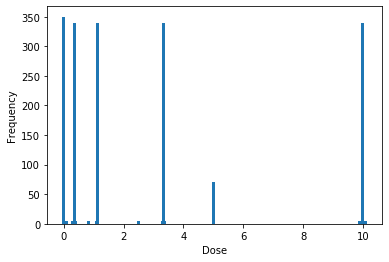

In [134]:
plt.bar(np.array(t.Dose), np.array(t.Frequency), width=0.1)        
plt.xlabel('Dose', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.show()

In [97]:
dose = drug.Metadata_mmoles_per_liter.unique().tolist()
d = pd.DataFrame(drug.groupby(['Metadata_mmoles_per_liter'])['Metadata_broad_sample'].count())
d.reset_index(inplace=True)
d.columns = ['Dose', 'Frequency']

len(d)

93

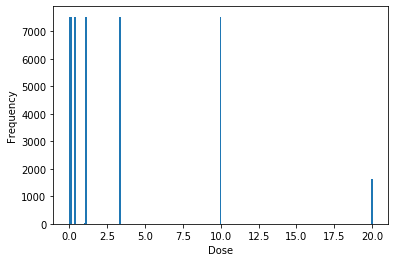

In [98]:
plt.bar(np.array(d.Dose), np.array(d.Frequency), width=0.1)        
plt.xlabel('Dose', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.show()